In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

In [17]:
movies = pd.read_csv("fandango_score_comparison.csv")
fandango = movies['Fandango_Stars']
meta = movies['Metacritic_norm_round']

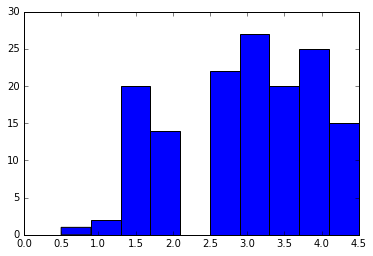

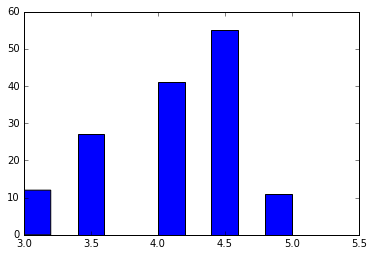

In [18]:
# Plotting Metacritic ratings and Fandango Ratings
plt.hist(meta)
plt.show()
plt.hist(fandango)
plt.show()

The most obvious difference is that Metacritic's ratings range from 0.5 to 4.5 while Fandango's ratings range from 3 to 5.

In [19]:
fandango_mean = fandango.mean()
meta_mean = meta.mean()

fandango_median = fandango.median()
meta_median = meta.median()

fandango_stdev = fandango.std()
meta_stdev = meta.std()

In [20]:
print(fandango_mean)
print(meta_mean)

4.08904109589
2.97260273973


In [21]:
print(fandango_median)
print(meta_median)

4.0
3.0


In [22]:
print(fandango_stdev)
print(meta_stdev)

0.540385977979
0.990960561374


The mean, median and standard deviations of the normalised scores from Metacritic and Fandango are not nearly as similar as one would expect, considering they are scoring the same movies.  The methodology they use however, is very different.  Metacritic uses a weighted average of movie critic  ratings while fandango avereges their users ratings.  

The numbers back up what the histograms showed.  Fandango has a much lower range, concentrated at the top of the ratings spectrum.  This is why the standard deviation for fandango is much lower, while the mean and median are both much higher.

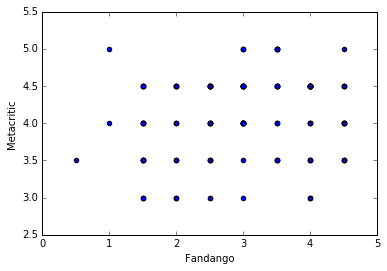

In [23]:
fig, ax = plt.subplots()
ax.scatter(meta, fandango)
ax.set_xlabel('Fandango')
ax.set_ylabel('Metacritic')
plt.show()

In [24]:
movies['fm_diff'] = meta - fandango
movies['fm_diff'] = abs(movies['fm_diff'])
movies = movies.sort_values('fm_diff', ascending=False)
print(movies.head())

                        FILM  RottenTomatoes  RottenTomatoes_User  Metacritic  \
3     Do You Believe? (2015)              18                   84          22   
85         Little Boy (2015)              20                   81          30   
47              Annie (2014)              27                   61          33   
19             Pixels (2015)              17                   54          27   
134  The Longest Ride (2015)              31                   73          33   

     Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  RT_norm  \
3                4.7   5.4             5.0                   4.5     0.90   
85               5.9   7.4             4.5                   4.3     1.00   
47               4.8   5.2             4.5                   4.2     1.35   
19               5.3   5.6             4.5                   4.1     0.85   
134              4.8   7.2             4.5                   4.5     1.55   

     RT_user_norm   ...     RT_norm_round  RT_user

In [25]:
r_val = scipy.stats.pearsonr(fandango, meta)
print(r_val)

(0.17844919073895918, 0.031161516228523815)


The correlation between fandango and meta is fairly low, which probably means we can't accurately predict a Metacritic score based on a Fandango score.

In [26]:
lr = scipy.stats.linregress(meta, fandango)
print(lr)

LinregressResult(slope=0.097311077973928267, intercept=3.7997739188994188, rvalue=0.17844919073895882, pvalue=0.031161516228524384, stderr=0.04471354465679829)


In [27]:
pred_3 = 3 * lr[0] + lr[1]
print(pred_3)

4.09170715282


In [28]:
pred_1 = 1 * lr[0] + lr[1]
print(pred_1)

3.89708499687


In [29]:
pred_5 = 5 * lr[0] + lr[1]
print(pred_5)

4.28632930877


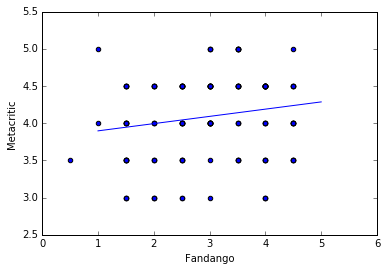

In [30]:
fig, ax = plt.subplots()
ax.scatter(meta, fandango)
ax.plot([1.0, 5.0], [pred_1, pred_5])
ax.set_xlabel('Fandango')
ax.set_ylabel('Metacritic')
plt.xlim()
plt.show()